In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import tf_keras as tfk
import PIL
import numpy as np
from matplotlib import pyplot as plt
import pathlib
import cv2
from sklearn.model_selection import train_test_split

In [3]:
input_shape=(224,224)
IMG_SIZE=input_shape+(3,)

In [ ]:

model=keras.applications.MobileNetV2(input_shape=IMG_SIZE,
                                               include_top=True,
                                               weights='imagenet')
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

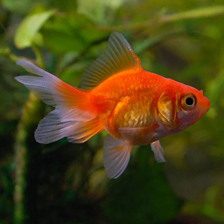

In [4]:
test_img=PIL.Image.open('/content/drive/MyDrive/data/tutrial_tensorflow/fish.webp').resize(input_shape)
test_img

In [ ]:
test_img=np.array(test_img)/255.0
test_img

array([[[0.30196078, 0.34117647, 0.09411765],
        [0.31372549, 0.36862745, 0.10588235],
        [0.34117647, 0.41960784, 0.12941176],
        ...,
        [0.33333333, 0.39607843, 0.02745098],
        [0.32156863, 0.38039216, 0.01568627],
        [0.30980392, 0.37254902, 0.00392157]],

       [[0.29019608, 0.32941176, 0.08235294],
        [0.32156863, 0.38431373, 0.11372549],
        [0.34117647, 0.41960784, 0.12941176],
        ...,
        [0.3254902 , 0.38431373, 0.01568627],
        [0.31372549, 0.37254902, 0.00784314],
        [0.30196078, 0.36078431, 0.        ]],

       [[0.29411765, 0.3254902 , 0.08235294],
        [0.32156863, 0.37647059, 0.10980392],
        [0.34117647, 0.41176471, 0.1254902 ],
        ...,
        [0.31764706, 0.38039216, 0.00784314],
        [0.30980392, 0.37254902, 0.00784314],
        [0.30196078, 0.36078431, 0.        ]],

       ...,

       [[0.05490196, 0.10588235, 0.01960784],
        [0.05882353, 0.10980392, 0.02352941],
        [0.05490196, 0

In [ ]:
result=model.predict(test_img[np.newaxis,...])
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[3.96513147e-04, 9.67229009e-01, 1.49043599e-05, 1.62215256e-05,
        2.33250921e-05, 1.11623231e-04, 1.24705166e-05, 3.23476634e-05,
        1.06046209e-04, 2.68434974e-06, 1.90607843e-05, 2.52593618e-05,
        3.95506468e-05, 1.42987719e-05, 1.47530709e-05, 1.61366479e-05,
        4.11725123e-05, 1.10201690e-05, 1.36434110e-05, 5.17809940e-06,
        8.56019233e-06, 2.28987610e-05, 1.38386249e-05, 2.28592689e-05,
        6.99678421e-05, 2.57163483e-05, 6.92109461e-05, 4.26227562e-05,
        1.47697110e-05, 1.49098822e-04, 4.64278492e-05, 1.84063065e-05,
        4.66234305e-05, 2.05851378e-04, 7.77647001e-05, 1.82368996e-04,
        2.09933452e-04, 1.06230225e-04, 1.61189437e-05, 1.73147873e-05,
        9.05064735e-06, 2.06827681e-05, 9.44719504e-05, 2.61070763e-05,
        7.93712843e-06, 1.81653577e-05, 1.61330609e-05, 6.48959976e-05,
        7.91664206e-06, 6.58678482e-06, 5.64894344e-06, 1.16637479e-04,
        1.29002110e-05, 2.25144431e-05, 2.03442742e-05, 9.951108

In [ ]:
predicted_label_index=np.argmax(result)
predicted_label_index

np.int64(1)

In [ ]:
image_labels=[]
with open('/content/drive/MyDrive/data/tutrial_tensorflow/imagenet_labels/imagenet_labels.txt','r') as f:
  image_labels=f.read().splitlines()
image_labels[:10]

[" 0: 'tench, Tinca tinca',",
 " 1: 'goldfish, Carassius auratus',",
 " 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',",
 " 3: 'tiger shark, Galeocerdo cuvieri',",
 " 4: 'hammerhead, hammerhead shark',",
 " 5: 'electric ray, crampfish, numbfish, torpedo',",
 " 6: 'stingray',",
 " 7: 'cock',",
 " 8: 'hen',",
 " 9: 'ostrich, Struthio camelus',"]

In [ ]:
image_labels[predicted_label_index]

" 1: 'goldfish, Carassius auratus',"

In [6]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flowers',origin=dataset_url,cache_subdir='/content/drive/MyDrive/data/tutrial_tensorflow',untar=True)
data_dir

'/content/drive/MyDrive/data/tutrial_tensorflow/flowers'

In [7]:
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/MyDrive/data/tutrial_tensorflow/flowers')

In [8]:
len(list(data_dir.glob('**/*.jpg')))

3670

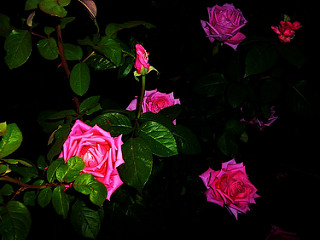

In [ ]:
roses=list(data_dir.glob('*/roses/*'))
PIL.Image.open(str(roses[5]))

In [9]:
flwers_img_dict={
    'daisy':list(data_dir.glob('*/daisy/*')),
    'dandelion':list(data_dir.glob('*/dandelion/*')),
    'roses':list(data_dir.glob('*/roses/*')),
    'sunflowers':list(data_dir.glob('*/sunflowers/*')),
    'tulips':list(data_dir.glob('*/tulips/*'))
}

In [10]:
flwers_lbl_dict={
    'daisy':0,
    'dandelion':1,
    'roses':2,
    'sunflowers':3,
    'tulips':4
}

In [11]:
X,Y=[],[]
for fldr_name,images in flwers_img_dict.items():
  for image in images:
    image=cv2.imread(str(image))
    resized_img=cv2.resize(image,input_shape)
    X.append(resized_img)
    Y.append(flwers_lbl_dict[fldr_name])

In [12]:
X=np.array(X)
Y=np.array(Y)

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)

In [14]:
print(len(X_train))
print(len(X_test))

2752
918


In [15]:
X_train=X_train/255
X_test=X_test/255

In [16]:
data_augmentation=keras.models.Sequential([
    keras.layers.RandomZoom(0.5),
])

In [17]:
IMG_SIZE=input_shape+(3,)
network=keras.applications.InceptionV3(input_shape=IMG_SIZE,
                                               include_top=False,
                                               weights='imagenet')
network.trainable=False
network.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [18]:
model2=keras.Sequential([
    data_augmentation,
    network,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(5,activation='softmax')
])
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ inception_v3 (Functional)            │ (None, 5, 5, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ ?                           │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [19]:
model2.compile(
    optimizer='adam',
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)
model2.fit(X_train,Y_train,epochs=50)

Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 85ms/step - accuracy: 0.5853 - loss: 1.1189
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.7952 - loss: 0.5276
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.8201 - loss: 0.4863
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.8561 - loss: 0.3924
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.8681 - loss: 0.3770
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.8628 - loss: 0.3822
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.8938 - loss: 0.3048
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.8632 - loss: 0.3864
Epoch 9/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.8916 - loss: 0.2843
Epoch 10/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.8852 - loss: 0.2906
Epoch 11/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9097 - loss: 0.2566
Epoch 12/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - a

In [20]:
model2.evaluate(X_test,Y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - accuracy: 0.8653 - loss: 0.5049


[0.5070498585700989, 0.8681917190551758]